In [1]:
!nvidia-smi

Sun Nov 27 06:37:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   23C    P0    43W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [84]:
!pip install datasets transformers evaluate huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.6 MB/s 


In [134]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
    
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [4]:
from datasets import load_dataset

In [ ]:
# dataset streaming (will only download the data as needed)
ds = load_dataset("bigcode/the-stack", data_dir="data/dockerfile", streaming=True, split="train")
# for sample in iter(ds): print(sample["content"])

In [ ]:
# for sample in iter(ds): print(sample["content"])

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint = "Salesforce/codegen-350M-multi" # 2B
base_model = AutoModelForCausalLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


device = 'cuda' if torch.cuda.is_available() else 'cpu' 

# model = AutoModelForMaskedLM.from_pretrained("distilbert-base-uncased")
base_model.train().to(device)

# maybe try sequence length of 1024


In [111]:
%%time

# text = """function setup() {
#   createCanvas(400, 400);
# }

# function draw() {"""


text = """
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0" />

        <link rel="stylesheet" href="styles.css" />
        <title>Frogs</title>
    </head>
    <body>"""

#         <header>
#             <h1>>Header</h1>
#         </header>

#         <script src="Index.js"></script>
#     </body>
# </html>
# """

# text = """
# Create a circle on a canvas
# """

batch = tokenizer(text, return_tensors="pt")

batch = {k: v.to(device) for k, v in batch.items()}

completion = base_model.generate(**batch, max_new_tokens = 512)

print(tokenizer.decode(completion[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0" />

        <link rel="stylesheet" href="styles.css" />
        <title>Frogs</title>
    </head>
    <body>
        <div id="container">
            <div id="content">
                <div id="main">
                    <h1>Frogs</h1>
                </div>
            </div>
        </div>
    </body>
</html>
`

const testHTML = `
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0" />

        <link rel="stylesheet" href="styles.css" />
        <title>Frogs</title>
    </head>
    <body>
        <div id="container">
            <div id="content">
                <div id="main">
                    <h1>Frogs</h1>
                </div>
            </div>
        </div>
    </body>
</html>
`

func TestRender(t *testing.T) {
	t.Paral

In [ ]:
print(model)

# Fine tune the model

In [11]:
import torch

torch.cuda.is_available()

True

In [124]:
from transformers import AutoModelForCausalLM, AutoTokenizer

checkpoint = "Salesforce/codegen-350M-multi" # 2B
model = AutoModelForCausalLM.from_pretrained(checkpoint)

device = 'cuda' if torch.cuda.is_available() else 'cpu' 

model.train().to(device)


tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenizer.add_special_tokens({'pad_token': '<|pad|>', 
                              'eos_token':'<|endoftext|>',  
                              'bos_token':'<|startoftext|>'})


2

# Pytorch Native way

In [125]:
from torch.utils.data.distributed import Dataset
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

seed, buffer_size = 42, 24

ds = load_dataset("bigcode/the-stack", data_dir="data/css", streaming=True, split="train")

dataset = ds.map(lambda examples: tokenizer(examples['content'], return_tensors="pt", padding='max_length', truncation=True, max_length=512)) #truncation = True, padding = True))

# dataset = dataset.map(lambda examples: examples['input_ids'][0, -1]) #examples.update({'label_ids': }

dataset = dataset.map(
    lambda x: {"label_ids": x['input_ids'][0, -1]}
)

# dataset = dataset.map(
#     lambda x: {"input_ids": x['input_ids'][:, 0:-1]}
# )

dataset = dataset.map(
    lambda x: {"input_ids": x['input_ids'].reshape(-1)}
)

dataset = dataset.map(
    lambda x: {"attention_mask": x['attention_mask'].reshape(-1)}
)

# dataset = dataset.map(
#     lambda x: {"input_ids": x['input_ids'][0]}
# )

# dataset = dataset.map(
#     lambda x: {"attention_mask": x['attention_mask'][0]}
# )

to_exclude = ['content', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'licenses', 'repository_name', 'path', 'size', 'lang', 'label_ids'] # 'input_ids', 'attention_mask', 'label_ids'

dataset = dataset.remove_columns(to_exclude)

# dataset = dataset.map(
#     lambda x: {"input_ids": pad_sequence(x['input_ids'].tolist(), batch_first = True)}
# )

dataset = dataset.shuffle(seed, buffer_size=buffer_size)

dataset = dataset.with_format("torch")

In [126]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForMaskedLM, #DataCollatorForLanguageModeling
from tqdm import tqdm

train_dataloader = DataLoader(dataset, batch_size=10)

In [58]:
# for i, _ in zip(dataset, [1, 2, 3]):
#   print(i.keys())

In [59]:
# ['content', 'avg_line_length', 'max_line_length', 'alphanum_fraction', 'licenses', 'repository_name', 'path', 'size', 'lang', 'input_ids', 'attention_mask', 'label_ids']

In [60]:
# for i, _ in zip(train_dataloader, [1, 2, 3]):
#   print(i)

In [127]:
from transformers import get_scheduler, get_cosine_schedule_with_warmup

optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-7)


num_epochs = 90
steps_per_epoch = 5


num_training_steps = num_epochs * steps_per_epoch

lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

cosine_lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer = optimizer, num_warmup_steps = 150, num_training_steps = num_training_steps
)

In [90]:
for batch in train_dataloader:
  print(batch.items())
  break

In [128]:
epoch_history = []
loss_history = []


for epoch in range(num_epochs):
    dataset.set_epoch(epoch)

    epoch_history.append(epoch)

    for i, batch in enumerate(tqdm(train_dataloader, total=steps_per_epoch)):
        if i == steps_per_epoch:
            break
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs[0]
        loss.mean().backward()

        loss_history.append(loss.mean())

        optimizer.step()
        cosine_lr_scheduler.step()
        optimizer.zero_grad()
        if i % 10 == 0:
            print(f" loss: {loss.mean()}")
            

 20%|██        | 1/5 [00:03<00:12,  3.10s/it]

 loss: 18.076702117919922


 20%|██        | 1/5 [00:02<00:10,  2.52s/it]

 loss: 16.793601989746094


 20%|██        | 1/5 [00:02<00:10,  2.71s/it]

 loss: 14.570626258850098


 20%|██        | 1/5 [00:02<00:09,  2.44s/it]

 loss: 18.63474464416504


 20%|██        | 1/5 [00:02<00:09,  2.49s/it]

 loss: 14.548398971557617


 20%|██        | 1/5 [00:03<00:12,  3.21s/it]

 loss: 16.583656311035156


 20%|██        | 1/5 [00:03<00:12,  3.05s/it]

 loss: 13.159344673156738


 20%|██        | 1/5 [00:04<00:16,  4.01s/it]

 loss: 17.687538146972656


 20%|██        | 1/5 [00:02<00:09,  2.28s/it]

 loss: 14.491167068481445


 20%|██        | 1/5 [00:03<00:13,  3.37s/it]

 loss: 14.070979118347168


 20%|██        | 1/5 [00:03<00:15,  3.99s/it]

 loss: 17.097578048706055


 20%|██        | 1/5 [00:02<00:10,  2.59s/it]

 loss: 11.910438537597656


 20%|██        | 1/5 [00:03<00:13,  3.48s/it]

 loss: 16.715364456176758


 20%|██        | 1/5 [00:03<00:13,  3.33s/it]

 loss: 14.84394359588623


 20%|██        | 1/5 [00:03<00:12,  3.12s/it]

 loss: 12.295144081115723


 20%|██        | 1/5 [00:03<00:13,  3.28s/it]

 loss: 16.115503311157227


 20%|██        | 1/5 [00:02<00:11,  2.75s/it]

 loss: 9.13477897644043


 20%|██        | 1/5 [00:02<00:10,  2.63s/it]

 loss: 10.357149124145508


 20%|██        | 1/5 [00:03<00:13,  3.27s/it]

 loss: 12.757976531982422


 20%|██        | 1/5 [00:02<00:10,  2.66s/it]

 loss: 11.856660842895508


 20%|██        | 1/5 [00:05<00:20,  5.12s/it]

 loss: 8.626347541809082


 20%|██        | 1/5 [00:06<00:24,  6.04s/it]

 loss: 12.707552909851074


 20%|██        | 1/5 [00:04<00:18,  4.63s/it]

 loss: 9.395090103149414


 20%|██        | 1/5 [00:04<00:19,  4.98s/it]

 loss: 12.726781845092773


 20%|██        | 1/5 [00:02<00:08,  2.20s/it]

 loss: 13.92534065246582


 20%|██        | 1/5 [00:02<00:10,  2.73s/it]

 loss: 13.037986755371094


 20%|██        | 1/5 [00:04<00:16,  4.01s/it]

 loss: 9.96101188659668


 20%|██        | 1/5 [00:02<00:10,  2.69s/it]

 loss: 9.30012321472168


 20%|██        | 1/5 [00:02<00:11,  2.84s/it]

 loss: 10.834664344787598


 20%|██        | 1/5 [00:04<00:16,  4.05s/it]

 loss: 10.036764144897461


 20%|██        | 1/5 [00:02<00:09,  2.26s/it]

 loss: 8.201153755187988


 20%|██        | 1/5 [00:03<00:12,  3.06s/it]

 loss: 10.124494552612305


 20%|██        | 1/5 [00:03<00:13,  3.46s/it]

 loss: 7.352560043334961


 20%|██        | 1/5 [00:02<00:10,  2.54s/it]

 loss: 8.057169914245605


 20%|██        | 1/5 [00:02<00:11,  2.76s/it]

 loss: 6.930476188659668


 20%|██        | 1/5 [00:02<00:11,  2.80s/it]

 loss: 7.178282737731934


 20%|██        | 1/5 [00:02<00:11,  2.87s/it]

 loss: 3.6854302883148193


 20%|██        | 1/5 [00:03<00:14,  3.56s/it]

 loss: 6.67251443862915


 20%|██        | 1/5 [00:02<00:09,  2.46s/it]

 loss: 6.352305889129639


 20%|██        | 1/5 [00:02<00:09,  2.46s/it]

 loss: 5.647571086883545


 20%|██        | 1/5 [00:02<00:10,  2.66s/it]

 loss: 2.759073257446289


 20%|██        | 1/5 [00:02<00:08,  2.22s/it]

 loss: 2.5127480030059814


 20%|██        | 1/5 [00:03<00:12,  3.21s/it]

 loss: 4.016353607177734


 20%|██        | 1/5 [00:02<00:11,  2.93s/it]

 loss: 1.985703706741333


 20%|██        | 1/5 [00:02<00:11,  2.89s/it]

 loss: -0.09356065839529037


 20%|██        | 1/5 [00:02<00:10,  2.53s/it]

 loss: 0.9578332901000977


 20%|██        | 1/5 [00:03<00:14,  3.74s/it]

 loss: 1.512976884841919


 20%|██        | 1/5 [00:02<00:10,  2.69s/it]

 loss: 1.879026174545288


 20%|██        | 1/5 [00:02<00:10,  2.57s/it]

 loss: 0.7418447136878967


 20%|██        | 1/5 [00:03<00:12,  3.23s/it]

 loss: 1.3609910011291504


 20%|██        | 1/5 [00:02<00:10,  2.53s/it]

 loss: 0.5855627655982971


 20%|██        | 1/5 [00:02<00:11,  2.85s/it]

 loss: -0.27331453561782837


 20%|██        | 1/5 [00:03<00:12,  3.05s/it]

 loss: -0.5312369465827942


 20%|██        | 1/5 [00:02<00:11,  2.79s/it]

 loss: -1.0744009017944336


 20%|██        | 1/5 [00:02<00:09,  2.50s/it]

 loss: -0.526948094367981


 20%|██        | 1/5 [00:03<00:13,  3.32s/it]

 loss: -1.0995848178863525


 20%|██        | 1/5 [00:02<00:10,  2.56s/it]

 loss: -0.614962637424469


 20%|██        | 1/5 [00:03<00:13,  3.43s/it]

 loss: -1.938238263130188


 20%|██        | 1/5 [00:02<00:11,  2.98s/it]

 loss: -1.5418620109558105


 20%|██        | 1/5 [00:02<00:10,  2.58s/it]

 loss: 0.2904965877532959


 20%|██        | 1/5 [00:12<00:49, 12.46s/it]

 loss: -0.6279785633087158


 20%|██        | 1/5 [00:02<00:11,  2.81s/it]

 loss: -3.5181691646575928


 20%|██        | 1/5 [00:02<00:11,  2.92s/it]

 loss: -1.9865546226501465


 20%|██        | 1/5 [00:02<00:11,  2.81s/it]

 loss: -2.629739761352539


 20%|██        | 1/5 [00:05<00:20,  5.20s/it]

 loss: -2.3835861682891846


 20%|██        | 1/5 [00:05<00:20,  5.19s/it]

 loss: -4.165061950683594


 20%|██        | 1/5 [00:05<00:21,  5.46s/it]

 loss: -2.513122797012329


 20%|██        | 1/5 [00:03<00:14,  3.52s/it]

 loss: -2.2499566078186035


 20%|██        | 1/5 [00:02<00:11,  2.88s/it]

 loss: -2.728827714920044


 20%|██        | 1/5 [00:05<00:21,  5.42s/it]

 loss: -3.4130847454071045


 20%|██        | 1/5 [00:02<00:10,  2.56s/it]

 loss: -4.687435626983643


 20%|██        | 1/5 [00:05<00:20,  5.13s/it]

 loss: -2.715751886367798


 20%|██        | 1/5 [00:05<00:22,  5.63s/it]

 loss: -3.7461302280426025


 20%|██        | 1/5 [00:05<00:20,  5.25s/it]

 loss: -5.068767547607422


 20%|██        | 1/5 [00:02<00:09,  2.43s/it]

 loss: -2.9949655532836914


 20%|██        | 1/5 [00:10<00:43, 10.76s/it]

 loss: -3.8275153636932373


 20%|██        | 1/5 [00:05<00:20,  5.19s/it]

 loss: -2.0233309268951416


 20%|██        | 1/5 [00:04<00:19,  4.91s/it]

 loss: -3.208757162094116


 20%|██        | 1/5 [00:05<00:20,  5.10s/it]

 loss: -3.597428798675537


 20%|██        | 1/5 [00:04<00:17,  4.48s/it]

 loss: -3.573007583618164


 20%|██        | 1/5 [00:05<00:21,  5.29s/it]

 loss: -2.774691581726074


 20%|██        | 1/5 [00:05<00:22,  5.66s/it]

 loss: -5.048397541046143


 20%|██        | 1/5 [00:03<00:13,  3.35s/it]

 loss: -2.8831515312194824


 20%|██        | 1/5 [00:06<00:24,  6.10s/it]

 loss: -5.181588172912598


 20%|██        | 1/5 [00:05<00:21,  5.27s/it]

 loss: -3.0786566734313965


 20%|██        | 1/5 [00:02<00:10,  2.67s/it]

 loss: -4.872005939483643


 20%|██        | 1/5 [00:05<00:22,  5.75s/it]

 loss: -4.671323776245117


 20%|██        | 1/5 [00:05<00:22,  5.58s/it]

 loss: -3.068155288696289


 20%|██        | 1/5 [00:05<00:22,  5.61s/it]

 loss: -3.778449535369873


 20%|██        | 1/5 [00:04<00:19,  4.90s/it]

 loss: -4.489591121673584


100%|██████████| 5/5 [00:09<00:00,  1.82s/it]


In [92]:
for batch in train_dataloader:
  print(batch.items())
  break

dict_items([('input_ids', tensor([[15211,  6624, 12982,  ...,    11,   201,   198],
        [15211,     0,   198,  ...,     4, 27422, 37424],
        [   31, 13199,  7972,  ..., 50295, 50295, 50295],
        ...,
        [  171,   119,   123,  ..., 50284, 17015,    25],
        [15211, 10097,   438,  ...,    13,    17, 17428],
        [    3, 13200,    12,  ...,    26,   198,     3]])), ('attention_mask', tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]))])


In [131]:
loss_history = [float(loss.cpu().detach().numpy()) for loss in loss_history]

AttributeError: ignored

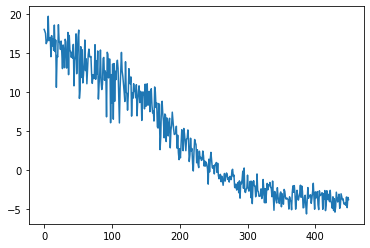

In [132]:
import matplotlib.pyplot as plt
plt.plot(loss_history);

In [ ]:
!pip install guesslang

In [123]:
from guesslang import Guess


guess = Guess()

name = guess.language_name("""
var fontWeight = /^(bold|700|800|900|normal|400|600|300|200|100|80|50|40|30|20|10|8|4|2|1)$/i;

function getFontWeight(font) {
  var i, prop, value;
  if (!font) {
    return;
  }
  for (i = 0; i < font.weight.length; i++) {
    prop = font.weight[i];
    value = '' + prop;
    if (fontWeight.test(value)) {
      return prop;
    }
  }
}

""")

print(name)

JavaScript


In [133]:
%%time

text = """
#container {
  padding: 10px;
}

h1 {
"""

# text = ""

# text = """
# Create a circle on a canvas
# """


batch = tokenizer(text, return_tensors="pt")

batch = {k: v.to(device) for k, v in batch.items()}

completion = model.generate(**batch, max_new_tokens = 512)

print(tokenizer.decode(completion[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



#container {
  padding: 10px;
}

h1 {
  font-size: 100%;
  line-height: 130%;
  font-weight: 400;
  font-style: italic;
  text-transform: uppercase;
}

.ace_editor {
  display: inline-block;
  margin: 0px;
  padding: 0px;
  border: 1px solid #ccc;
  border-radius: 2px;
  position: absolute;
  top: 0px;
  left: 0px;
  padding: 4px 8px;
  background: #fff;
}

.ace_editor.ace_cursor.ace_overwrite_tag {
  text-decoration: underline;
}

.ace_editor.ace_marker-layer.ace_selection {
  background: #00ff00;
  color: #666;
}

.ace_editor.ace_marker-layer.ace_step {
  background: #00ff00;
  padding: 0 4px;
}

.ace_editor.ace_marker-layer.ace_bracket {
  margin: -1px 0 0 -1px;
  border: 1px solid #ccc;
  padding: 1px 8px;
}

.ace_editor.ace_marker-layer.ace_active_line {
  background: #00ff00;
  opacity: 0.5;
}

.ace_editor.ace_gutter_active_line {
  background-color: #eee;
  opacity: 0.5;
  cursor: pointer;
  text-shadow: 1px 1px 1px #000;
  border-radius: 2px;
}

.ace_editor.ace_marker-layer.ac

# Save

In [93]:
!pwd

/content


In [135]:
import os
# os.makedirs("css_model")

model.save_pretrained("css_model")

model.push_to_hub("codegen_css")

CommitInfo(commit_url='https://huggingface.co/alecsharpie/codegen_css/commit/a71cc47c6635199d01b20f1d7ecde43c7908450b', commit_message='Upload CodeGenForCausalLM', commit_description='', oid='a71cc47c6635199d01b20f1d7ecde43c7908450b', pr_url=None, pr_revision=None, pr_num=None)

# Evaluate

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [ ]:
# https://huggingface.co/docs/transformers/perplexity

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
import evaluate

metric = evaluate.load("accuracy")
model.eval()

for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

In [33]:
for k, v in batch.items():
  print(v.shape)

torch.Size([2, 512])
torch.Size([2, 512])


# Easy huggingface trainer way

In [ ]:
from torch.utils.data.distributed import Dataset
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

seed, buffer_size = 42, 512

ds = load_dataset("bigcode/the-stack", data_dir="data/css", streaming=True, split="train")

dataset = ds.map(lambda examples: tokenizer(examples['content'], return_tensors="pt", padding='max_length', truncation=True, max_length=512)) #truncation = True, padding = True))

# dataset = dataset.map(lambda examples: examples['input_ids'][0, -1]) #examples.update({'label_ids': }

dataset = dataset.map(
    lambda x: {"label_ids": x['input_ids'][0, -1]}
)

dataset = dataset.map(
    lambda x: {"input_ids": x['input_ids'][:, 0:-1]}
)

# dataset = dataset.map(
#     lambda x: {"input_ids": pad_sequence(x['input_ids'].tolist(), batch_first = True)}
# )

dataset = dataset.shuffle(seed, buffer_size=buffer_size)

dataset = dataset.with_format("torch")

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", max_steps = 3, per_device_train_batch_size = 2)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    # eval_dataset=small_eval_dataset,
    # compute_metrics=compute_metrics,
)

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer.train()

***** Running training *****
  Num examples = 6
  Num Epochs = 9223372036854775807
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 3
  Number of trainable parameters = 356712448
The following columns in the training set don't have a corresponding argument in `CodeGenForCausalLM.forward` and have been ignored: lang, max_line_length, path, licenses, repository_name, avg_line_length, size, alphanum_fraction, content. If lang, max_line_length, path, licenses, repository_name, avg_line_length, size, alphanum_fraction, content are not expected by `CodeGenForCausalLM.forward`,  you can safely ignore this message.


RuntimeError: ignored

In [ ]:
input_ids,past_key_values,attention_mask,token_type_ids,position_ids,head_mask,inputs_embeds,labels,use_cache,output_attentions,output_hidden_states,return_dict,label,label_ids,labels.

In [ ]:
for i, _ in zip(dataset, [1, 2, 3]):
  print(i['input_ids'].tolist(), i['label_ids'])